# SPY Trade

In [33]:
# Setup of Environment
from matplotlib import pyplot as plt
from pandas.tseries.offsets import Week, DateOffset

import numpy as np
import pandas as pd

pd.options.mode.copy_on_write = True

In [2]:
# Variable Definitition
url = 'https://raw.githubusercontent.com/SimonaRoja/kevin/main/pyalgo_eikon_eod_data.csv' #input file
symbol = 'SPY'
sma = 10  #used simple moving average

In [3]:
# Read CSV & Sort by Date Ascending
data = pd.read_csv(url, index_col=0, parse_dates=True) #Read csv, use 1st column as index and interpret date
data = data.sort_index(ascending=True) #Sort ascending


In [4]:
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.3500,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,289.910000,158.670,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.800000,158.960,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33
2019-12-30,291.520000,157.590,59.62,1846.89,229.80,321.08,3221.29,14.82,1.1197,1515.1230,29.49,142.63


In [5]:
# Get only a Specific Symbol from the Data
data = pd.DataFrame(data[symbol])

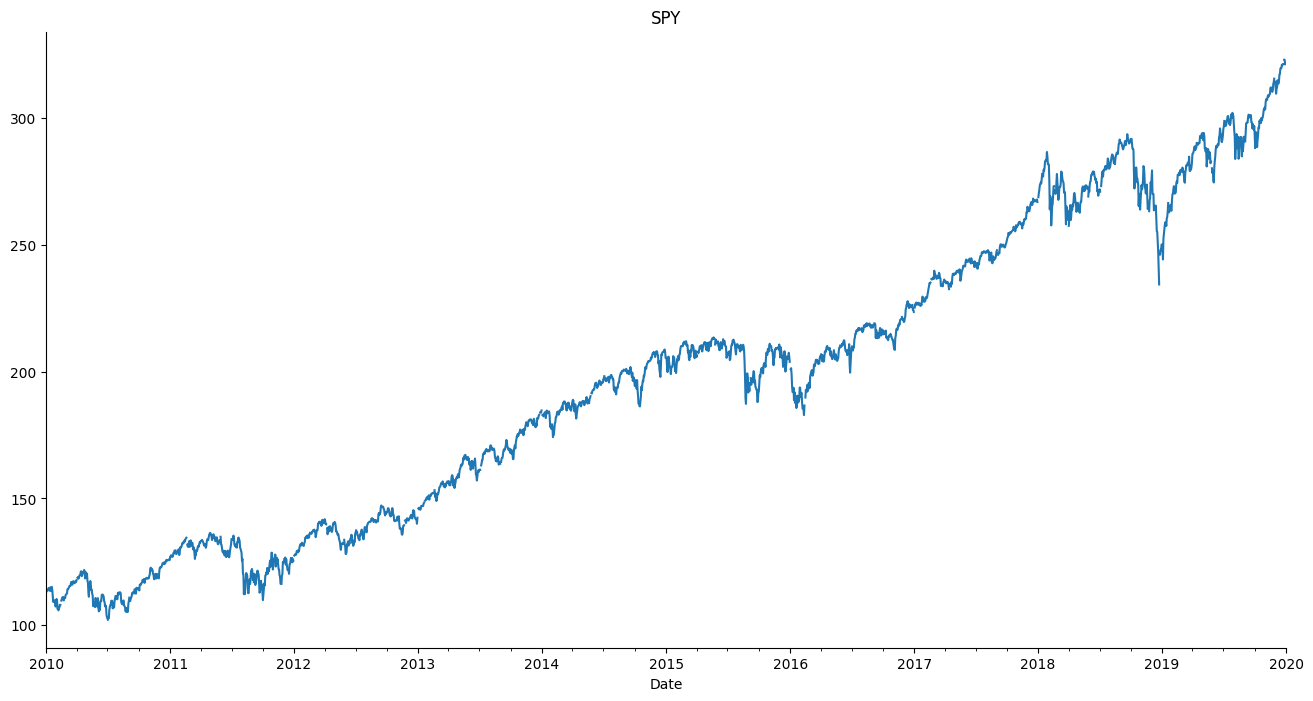

In [6]:
data[symbol].plot(kind='line', figsize=(16, 8), title=symbol)
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
# Create Simple Moving Average
data['SMA'] = data[symbol].rolling(sma).mean()
data = data.dropna()

In [8]:
data

,SPY,SMA
Date,,
2010-01-15,113.64,114.101
2010-02-01,109.06,110.379
2010-02-02,110.38,109.911
2010-02-03,109.83,109.505
2010-02-04,106.44,108.979
...,...,...
2019-12-18,319.59,316.183
2019-12-19,320.90,317.071
2019-12-20,320.73,317.657


In [9]:
# Identify all Dates where the closing price is below SMA
# Use 1 for True and 0 for False => Easier for later calculation

data['Today_Below_SMA'] = np.where(data['SMA'] > data[symbol], 1, 0)

In [10]:
# Calculate the Simple Moving Average again - only if is all days below the value is 1
# IMPORTANT - if you want to buy the next day add +1 to the value of sma
data['%_Days_Below_SMA'] = data['Today_Below_SMA'].rolling(sma).mean()
data = data.dropna()
data

,SPY,SMA,Today_Below_SMA,%_Days_Below_SMA
Date,,,,
2010-02-11,108.13,107.801,0,0.7
2010-02-12,108.04,107.866,0,0.6
2010-03-01,111.89,110.714,0,0.5
2010-03-02,112.20,110.960,0,0.5
2010-03-03,112.30,111.164,0,0.5
...,...,...,...,...
2019-12-18,319.59,316.183,0,0.0
2019-12-19,320.90,317.071,0,0.0
2019-12-20,320.73,317.657,0,0.0


In [11]:
# Get Only the dates with at least the number of SMA days below SMA
# If sma=5, check if the price is 5 days below the simple moving average
data[data['%_Days_Below_SMA'] == 1]

,SPY,SMA,Today_Below_SMA,%_Days_Below_SMA
Date,,,,
2010-05-26,107.17,110.73430,1,1.0
2010-07-19,107.29,107.50685,1,1.0
2010-08-24,105.53,108.19436,1,1.0
2010-08-25,105.94,107.85836,1,1.0
2010-08-26,105.23,107.51836,1,1.0
...,...,...,...,...
2019-10-03,290.42,295.08700,1,1.0
2019-10-04,294.35,294.69400,1,1.0
2019-10-07,293.08,294.18100,1,1.0


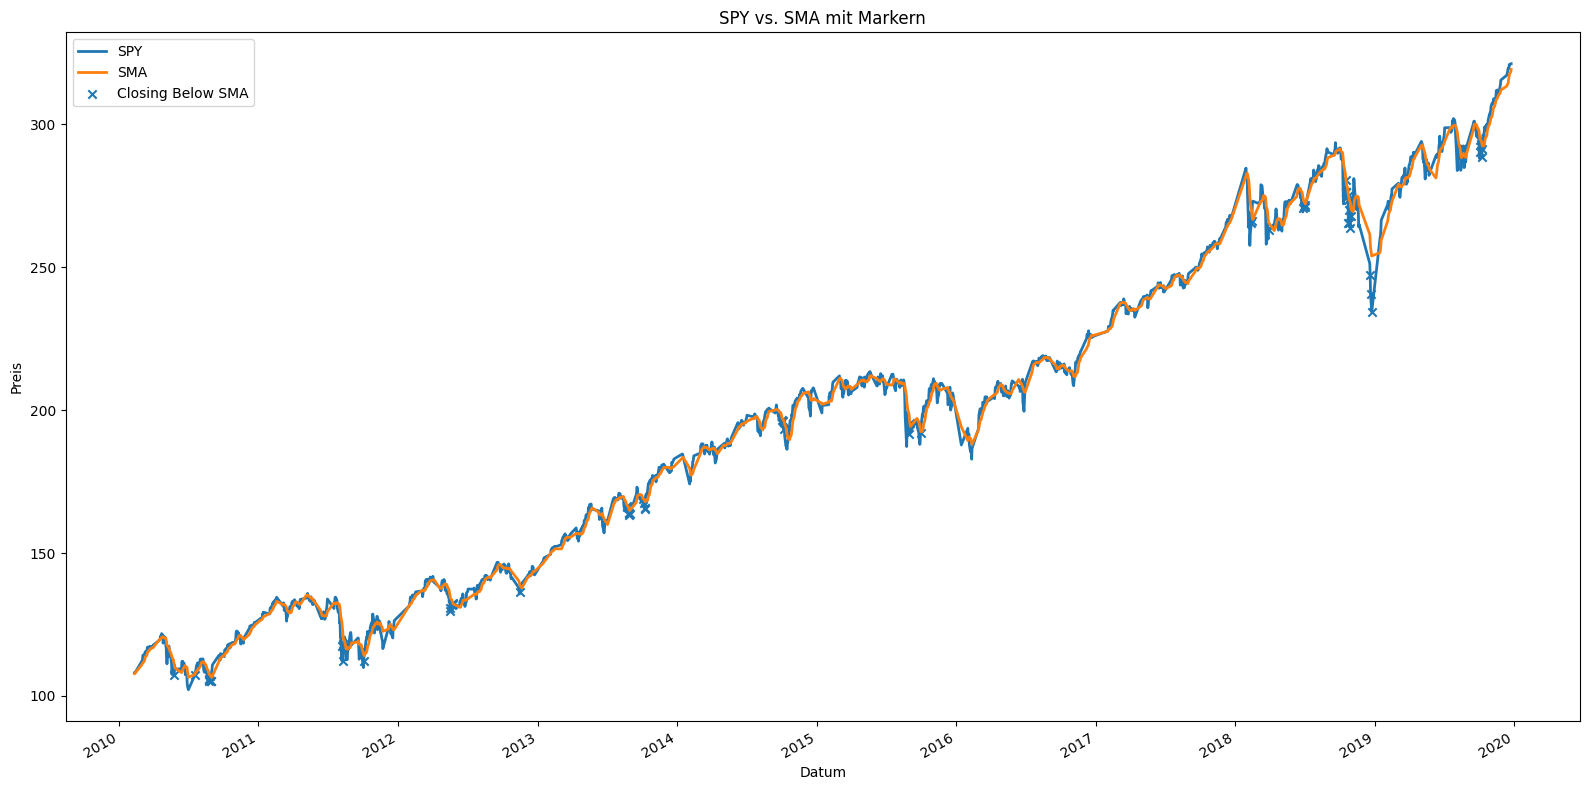

In [29]:
# Plot mit pandas-Plot und zusätzlichem Scatter fürs Marker
fig, ax = plt.subplots(figsize=(16, 8))
data[[symbol, 'SMA']].plot(ax=ax, kind='line', linewidth=2)

mask = data['%_Days_Below_SMA'] == 1
ax.scatter(data.index[mask], data.loc[mask, symbol], marker='x', label='Closing Below SMA')

ax.set_title('SPY vs. SMA with Marks')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.tight_layout()
plt.show()

# Need to figure out why marker on SMA line instead of symbol line

In [34]:
# Ass 90 days to the start date
# TODO Get the next Friday + 90 + next Friday
data['End_Date'] = data.index + Week(weekday=4) + DateOffset(days=90)

In [35]:
data

,SPY,SMA,Today_Below_SMA,%_Days_Below_SMA,End_Date
Date,,,,,
2010-02-11,108.13,107.801,0,0.7,2010-05-13
2010-02-12,108.04,107.866,0,0.6,2010-05-20
2010-03-01,111.89,110.714,0,0.5,2010-06-03
2010-03-02,112.20,110.960,0,0.5,2010-06-03
2010-03-03,112.30,111.164,0,0.5,2010-06-03
...,...,...,...,...,...
2019-12-18,319.59,316.183,0,0.0,2020-03-19
2019-12-19,320.90,317.071,0,0.0,2020-03-19
2019-12-20,320.73,317.657,0,0.0,2020-03-26


# The result needs to be copied to ThinkOrSwim

## The code below must be first copied and then the output lines
## I had issues with the number of lines in the study, I removed most of them

# Lines are drawn in different colors don't know why



plot Data = close;

###############################
# 1) Function that only returns the value
###############################
script RangeLineValue {
    input price     = 0.0;   # where should the line be drawn?
    input startDate = 0;     # in YYYYMMDD format
    input endDate   = 0;

    def today  = GetYYYYMMDD();
    def active = today >= startDate and today <= endDate;

    # plot returns the value but is not yet drawn
    plot value = if active then price else Double.NaN;
    value.SetDefaultColor(Color.RED);
}

###############################
# 2) Main part: turn it into a line
###############################

In [53]:
# filtere nur die Zeilen mit %_Days_Below_SMA == 1
mask = data['%_Days_Below_SMA'] == 1
filtered = data[mask]

for idx, row in filtered.iterrows():
    # formatiere das Datum im gewünschten Format YYYYMMDD
    startDate = idx.strftime('%Y%m%d')
    endDate = row['End_Date'].strftime('%Y%m%d')
    price     = row[symbol]

    # Name der Linie: line<startDate>
    name = f"line{startDate}"

    # Ausgabezeile
    print(f"plot {name} = RangeLineValue(price={price}, startDate={startDate}, endDate={endDate});")

plot line20100526 = RangeLineValue(price=107.17, startDate=20100526, endDate=20100826);
plot line20100719 = RangeLineValue(price=107.29, startDate=20100719, endDate=20101021);
plot line20100824 = RangeLineValue(price=105.53, startDate=20100824, endDate=20101125);
plot line20100825 = RangeLineValue(price=105.94, startDate=20100825, endDate=20101125);
plot line20100826 = RangeLineValue(price=105.23, startDate=20100826, endDate=20101125);
plot line20100827 = RangeLineValue(price=106.86, startDate=20100827, endDate=20101202);
plot line20100830 = RangeLineValue(price=105.311, startDate=20100830, endDate=20101202);
plot line20100831 = RangeLineValue(price=105.31, startDate=20100831, endDate=20101202);
plot line20110809 = RangeLineValue(price=117.48, startDate=20110809, endDate=20111110);
plot line20110810 = RangeLineValue(price=112.29, startDate=20110810, endDate=20111110);
plot line20110811 = RangeLineValue(price=117.33, startDate=20110811, endDate=20111110);
plot line20110812 = RangeLineVa